# Dataset Exploring and Environment setup

### Explore data and find out size of the dataset, number of columns, type of each column.

In [178]:
import pandas as pd

df = pd.read_csv("train.csv")

print("The size of dataset is {}.".format(df.size))
print("There are {} rows in dataset.".format(df.shape[0]))
print("There are {} columns in dataset.\n".format(df.shape[1]))

i = 0
for col in df.columns:
    print("Column {}:".format(i))
    print("Name: {} Type: {} Example: {}".format('"' + col + '",', df.dtypes[i], df[col][0]))
    i += 1


The size of dataset is 128856.
There are 10738 rows in dataset.
There are 12 columns in dataset.

Column 0:
Name: "customer_id", Type: object Example: csid_1
Column 1:
Name: "customer_visit_score", Type: float64 Example: 13.168424934582866
Column 2:
Name: "customer_product_search_score", Type: float64 Example: 9.447661690795815
Column 3:
Name: "customer_ctr_score", Type: float64 Example: -0.0702026428938979
Column 4:
Name: "customer_stay_score", Type: float64 Example: -0.1395408792861613
Column 5:
Name: "customer_frequency_score", Type: float64 Example: 0.4369560308164117
Column 6:
Name: "customer_product_variation_score", Type: float64 Example: 4.705760939212163
Column 7:
Name: "customer_order_score", Type: float64 Example: 2.537985051869976
Column 8:
Name: "customer_affinity_score", Type: float64 Example: 7.959503221378464
Column 9:
Name: "customer_active_segment", Type: object Example: C
Column 10:
Name: "X1", Type: object Example: F
Column 11:
Name: "customer_category", Type: int64

# Data Visualization

### For every categorical variable build a barplot, for every numerical value build boxplot.

<ipython-input-179-efdbd4402bea>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(num_cols, rotation=45, fontsize=7)


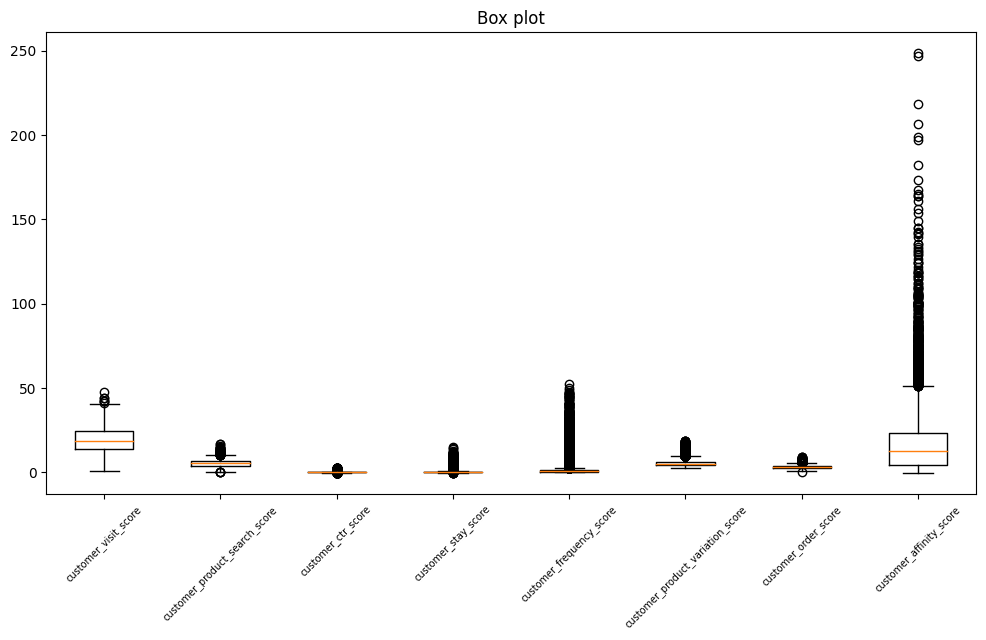

Mean:
customer_visit_score                19.060941
customer_product_search_score        5.267807
customer_ctr_score                   0.175912
customer_stay_score                  0.373304
customer_frequency_score             2.376895
customer_product_variation_score     5.793880
customer_order_score                 3.146411
customer_affinity_score             17.061836
customer_category                    0.120600
dtype: float64


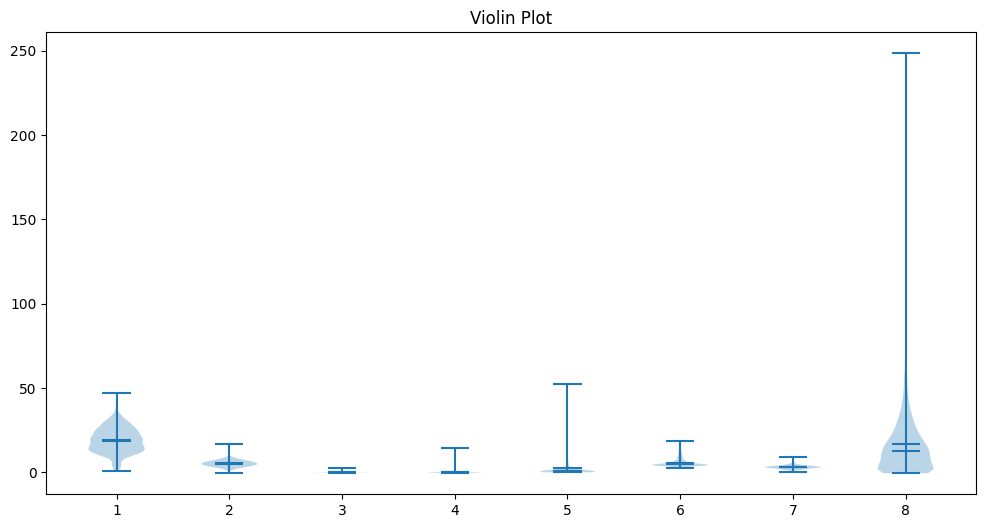

Standard deviation:
customer_visit_score                 7.419609
customer_product_search_score        1.882230
customer_ctr_score                   0.372829
customer_stay_score                  1.220025
customer_frequency_score             5.601911
customer_product_variation_score     2.527376
customer_order_score                 1.033277
customer_affinity_score             18.762693
customer_category                    0.325677
dtype: float64




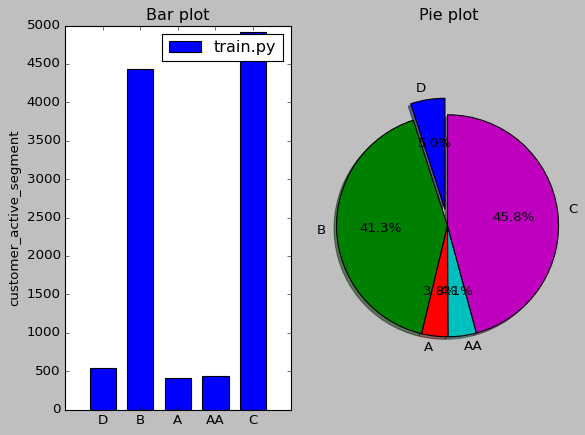

Frequency:
C     4919
B     4430
D      536
AA     441
A      412
Name: customer_active_segment, dtype: int64




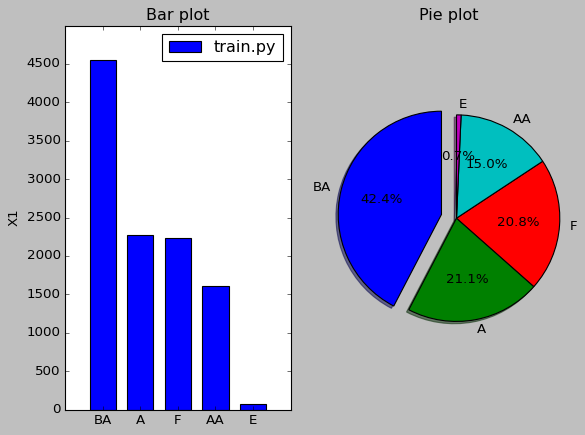

Frequency:
BA    4548
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64




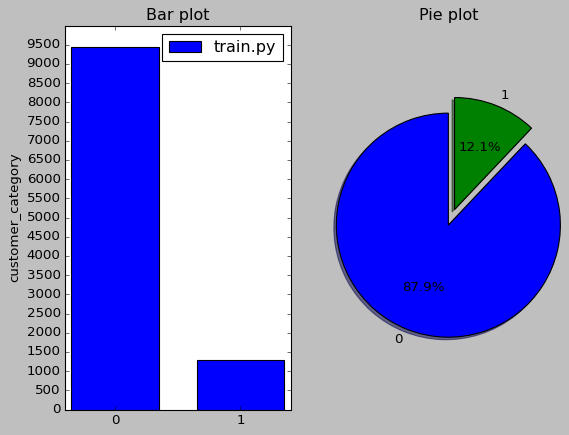

Frequency:
0    9443
1    1295
Name: customer_category, dtype: int64




In [179]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


cat_cols = df.columns[-3:]
num_cols = df.columns[1:-3]

for col in df.columns:
    df[col] = df[col].fillna(np.random.choice(df[col].unique()))
    

# numerical
plt.style.use('default') 


fig1, ax1 = plt.subplots(figsize=(12, 6))   

ax1.set_xticklabels(num_cols, rotation=45, fontsize=7)
ax1.boxplot(df[num_cols])
ax1.set_title("Box plot")
plt.show()

print("Mean:")
print(df.mean())


fig2, ax2 = plt.subplots(figsize=(12, 6)) 
ax2.violinplot(df[num_cols], showmeans=True, showmedians=True)

ax2.set_title('Violin Plot')
plt.show()

print("Standard deviation:")
print(df.std())
print("\n")


plt.style.use('classic') 
# categorical
for col in cat_cols:
    data = df[col]
   
    fig, axes = plt.subplots(nrows=1, ncols=2)
        
    x = set(data)
    
    # bar plot
    y = []
    for i in x:
        y.append(list(data).count(i))
            
    ind = np.arange(len(x))
    width = 0.7

    axes[0].bar(ind, y, width)
    axes[0].set_ylabel(col)
    axes[0].set_title('Bar plot')
    axes[0].set_xticks(ind)
    axes[0].set_xticklabels(x)
    axes[0].set_yticks(np.arange(0, max(y) + 200, 500))
    axes[0].legend(handles=[mpatches.Patch(label='train.py')])   
        
    # pie plot
    labels = list(x)
    
    explode = [0.15] + [0 for i in range(len(x) - 1)]

    axes[1].set_title('Pie plot')
    axes[1].pie(y, explode=explode, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
    axes[1].axis('equal') 

    plt.show()
    print("Frequency:")
    print(data.value_counts())
        
    print("\n")


### Normalize data. Calculate statistics (mean, standard deviation, correlation matrix, frequency) where possible.

In [180]:
normalized_df = df.copy()
normalized_df[num_cols] = normalized_df[num_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

normalized_df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,C,F,0
1,csid_2,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,C,A,0
2,csid_3,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,C,BA,0
3,csid_4,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,AA,F,0
4,csid_5,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,C,BA,0
10734,csid_10735,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,C,BA,0
10735,csid_10736,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,A,BA,0
10736,csid_10737,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,B,AA,0


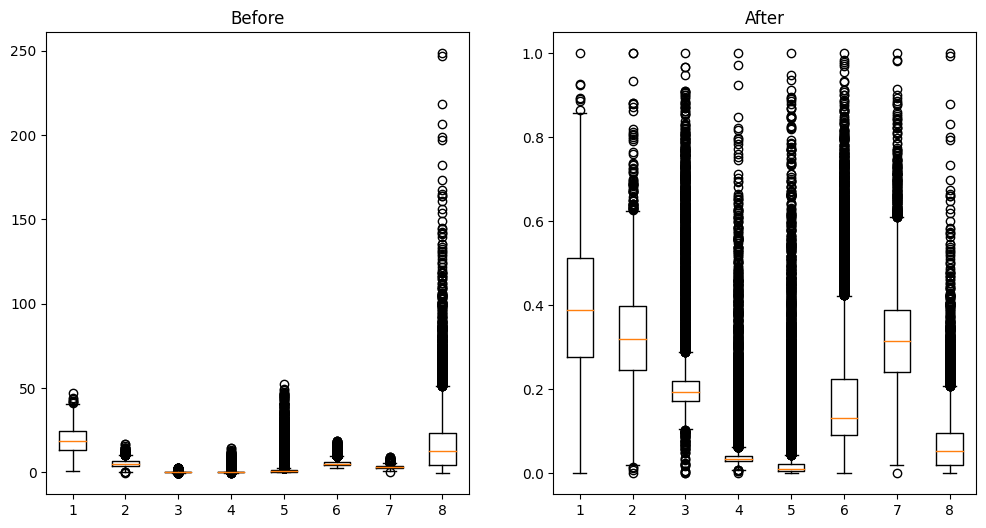

In [181]:
plt.style.use('default') 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))    
axes[0].boxplot(df[num_cols])
axes[0].set_title("Before")
    
axes[1].boxplot(normalized_df[num_cols])
axes[1].set_title("After")

plt.show()


In [182]:
cor_matr = normalized_df.corr()
cor_matr

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.271572,-0.569430,-0.473144,-0.209270,-0.219677,0.169783,0.118925,-0.449654
customer_product_search_score,0.271572,1.000000,-0.413926,-0.412447,-0.022501,-0.065662,0.049830,0.043385,-0.299380
customer_ctr_score,-0.569430,-0.413926,1.000000,0.907285,0.419461,0.447070,-0.341158,-0.232876,0.794445
customer_stay_score,-0.473144,-0.412447,0.907285,1.000000,0.400030,0.405270,-0.309926,-0.210390,0.677982
customer_frequency_score,-0.209270,-0.022501,0.419461,0.400030,1.000000,0.701520,-0.531376,-0.326201,0.389465
customer_product_variation_score,-0.219677,-0.065662,0.447070,0.405270,0.701520,1.000000,-0.690050,-0.525129,0.492600
customer_order_score,0.169783,0.049830,-0.341158,-0.309926,-0.531376,-0.690050,1.000000,0.761481,-0.383632
customer_affinity_score,0.118925,0.043385,-0.232876,-0.210390,-0.326201,-0.525129,0.761481,1.000000,-0.274105
customer_category,-0.449654,-0.299380,0.794445,0.677982,0.389465,0.492600,-0.383632,-0.274105,1.000000


### Build heat map to see how features correlate with the target value.

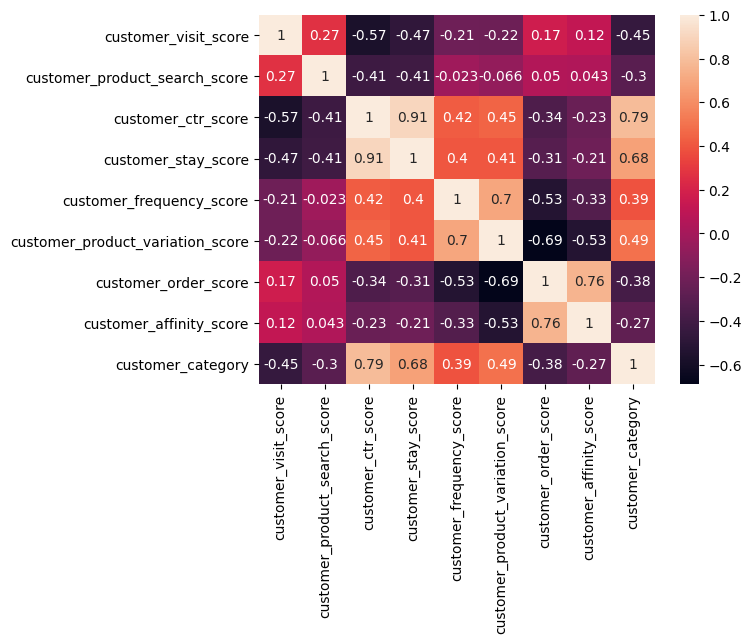

In [183]:
import seaborn as sb

sb.heatmap(cor_matr, annot=True)
plt.show()

### Encode all categorical features as integers so that you can use them during model training. 

In [184]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

normalized_df[cat_cols] = normalized_df[cat_cols].apply(lambda x: le.fit_transform(x))
normalized_df = normalized_df.drop(["customer_id"], axis=1)

normalized_df

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0
10735,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,0,2,0
10736,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,2,1,0


# Random Forest

### Resolving outliers, partially absent data, format mismatch.

In [185]:
from scipy.stats import zscore

filtered = normalized_df.copy()
filtered = filtered[(np.abs(zscore(filtered)) < 3).all(axis=1)]
filtered

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10731,0.610325,0.390081,0.153900,0.025240,0.007759,0.127516,0.215561,0.027057,2,2,0
10732,0.301578,0.327601,0.183398,0.022250,0.004592,0.113201,0.380645,0.058437,3,0,0
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0


### Make customers classification provided in the dataset by applying Random Forest classifier. For each class print: precision, recall, accuracy.

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

forest_clf = RandomForestClassifier(n_estimators=100)

X = filtered.copy()
X = X.drop(['customer_category'], 1)

y = filtered['customer_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

forest_clf.fit(X_train, y_train)
y_predicted = forest_clf.predict(X_test)

print("Precision: ", metrics.precision_score(y_test, y_predicted))
print("Recall: ", metrics.recall_score(y_test, y_predicted))
print("Accuracy: ", metrics.accuracy_score(y_test, y_predicted))


Precision:  0.9375
Recall:  0.6617647058823529
Accuracy:  0.9719525350593312


# Feature Selection

### Improve Random Forest classification accuracy by applying Feature Selection algorithms.

In [189]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


forest_clf1 = RandomForestClassifier(n_estimators=100)

select = SelectKBest(chi2, k=7)
X_new = select.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

forest_clf1.fit(X_train, y_train)
y_predicted = forest_clf1.predict(X_test)

print("Precision: ", metrics.precision_score(y_test, y_predicted))
print("Recall: ", metrics.recall_score(y_test, y_predicted))
print("Accuracy: ", metrics.accuracy_score(y_test, y_predicted))


Precision:  0.90625
Recall:  0.8226950354609929
Accuracy:  0.9800431499460626
